# NLP and the Web: Home Exercise 9

This homework exercise is about the PageRank algortithm. You will reimplement and execute this algorithm.

## About the data

The data comes in `.csv` format and contains links for links between 15 web pages (only ids). Each row represents one link and contains two columns. The link points from the webpage with the id of `source` to the webage with the id `destination`.


In [9]:
# Imports
import pandas as pd
import numpy as np
import collections, random
import seaborn as sns
sns.set()


def print_matrix(matrix):
    string_values = [[str(round(e,2)) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*string_values)]
    fmt = ' '.join('{{:{}}}'.format(x) for x in lens)
    print('\n'.join([fmt.format(*row) for row in string_values]))

In [10]:
# Whenever you are asked to output a matrix, use this function, e.g.:
matrix = np.array([[1.234, 5.678, 9.0], [1,2,3], [2.222, 3.333, 4.444]])
print_matrix(matrix)

1.23 5.68 9.0 
1.0  2.0  3.0 
2.22 3.33 4.44


## Task 1: Compute matrizes (6 Points)
**a)** Load the data and compute the link matrix $m$. The value of $m_{i,j}=0$ if no link from $i$ to $j$ exists and $m_{i,j}=1$ if such a link exists. Implement the function `compute_link_matrix` and execute it on the loaded data. You have to compute the pages from the given data. Do assume web pages 0-14 (from task description) in a hard coded way. Output the resulting link matrix using `print_matrix()`. 

In [11]:
def compute_link_matrix(data):
    """
    Computes the link matrix based on the definition stated above.
    :param data
        Loaded links. Use this data to programatically find the webpages.
    """
    result = np.zeros((15, 15))
    for i, row in data.iterrows():
        result[row[0]-1,row[1]-1]=1   
    return result

In [12]:
df = pd.read_csv("page_links.csv")
links_matrix = compute_link_matrix(df)
print_matrix(links_matrix)

0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0
0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0


**b)** Compute link probability matrix based on the link matrix. Each $m_{i,j}$ should be the probability that a person reaches the webpage $j$ when clicking on a random link on webpage $i$ (see slide 48 of the lecture 07). $m_{i,j}=0$ if no link from $i$ to $j$ exists. Implement the function `compute_link_probability_matrix`, execute it on the link matrix. Output the resulting matrix using `print_matrix()`. 

In [13]:
def compute_link_probability_matrix(link_matrix):
    result = link_matrix
    for i in range(0,15):   
        num_outlinks = np.sum(links_matrix[i])
        result[i] = np.where(result[i] == 1, 1/num_outlinks, result[i])
    return result

In [14]:
link_prob_matrix = compute_link_probability_matrix(links_matrix)
print_matrix(link_prob_matrix)

0.0  0.0  0.0  0.5 0.0  0.0  0.0  0.0  0.0  0.0 0.0  0.0  0.5  0.0  0.0
0.0  0.0  0.0  0.0 0.0  0.0  0.5  0.0  0.0  0.0 0.0  0.0  0.5  0.0  0.0
0.0  0.0  0.0  0.0 0.25 0.25 0.0  0.25 0.25 0.0 0.0  0.0  0.0  0.0  0.0
0.2  0.2  0.2  0.0 0.2  0.0  0.2  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0
0.0  0.0  0.2  0.2 0.0  0.2  0.0  0.2  0.0  0.2 0.0  0.0  0.0  0.0  0.0
1.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0
0.14 0.14 0.14 0.0 0.14 0.14 0.0  0.0  0.0  0.0 0.14 0.0  0.14 0.0  0.0
0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0
0.0  0.33 0.33 0.0 0.0  0.33 0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0
0.0  0.0  0.0  0.2 0.0  0.2  0.2  0.0  0.0  0.0 0.0  0.2  0.2  0.0  0.0
0.0  0.17 0.0  0.0 0.0  0.17 0.17 0.17 0.17 0.0 0.0  0.0  0.17 0.0  0.0
0.0  0.0  0.0  0.0 0.0  0.0  0.0  1.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0
0.0  0.0  0.0  0.0 0.0  0.25 0.25 0.0  0.25 0.0 0.0  0.0  0.0  0.25 0.0
0.0  0.0  0.0  0.0 0.25 0.0  0.0  0.25 0.25 0.0 0.0  0.25 0.0  0

c:\users\nguyen\pycharmprojects\nlp4web\venv\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


**c)** Implement the function `compute_teleport_matrix`. Teleporting from one webpage to any webpage has the same probability. Infer the right value for `page_count` dynamically, i.e. either based on the data itself, or on the results of 1a) or 1b). Do not use hard coded 15 from the task description. Execute the function and output the resulting teleport matrix using `print_matrix()`.

In [15]:
def compute_teleport_matrix(num_pages):
    result = np.full((num_pages,num_pages), 1/num_pages)
    return np.round(result, 3)

In [16]:
teleport_matrix = compute_teleport_matrix(15)
print_matrix(teleport_matrix)

0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 

**d)** Implement the function `compute_transition_matrix`. As arguments it takes the teleport matrix and the link probabilities from tasks 1c) and 1b), and the teleporting probability, indicating how likely a teleporting event is. Execute the function with the matrices from 1c) and 1b) and a teleporting probability of $0.1$. Output the resulting transition matrix using `print_matrix()`.

In [17]:
def compute_transition_matrix(teleport_matrix, link_probability_matrix, teleporting_probability=0.1):
    """
    Compute the transition matrix based on the teleport matrix and the link matrix
    :param teleport_matrix
        As computed in 1d)
    :param link_probability_matrix
        As computed in 1c)
    :param teleport_probability
        Probability that a page is reached via teleport (float)
    """
    teleport_matrix = teleport_matrix*teleporting_probability
    link_probability_matrix= link_probability_matrix*(1-teleporting_probability)
    result = teleport_matrix+link_probability_matrix
    return result 

In [18]:
transition_matrix=compute_transition_matrix(teleport_matrix,link_prob_matrix)
print_matrix(transition_matrix)

0.01 0.01 0.01 0.46 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.46 0.01 0.01
0.01 0.01 0.01 0.01 0.01 0.01 0.46 0.01 0.01 0.01 0.01 0.01 0.46 0.01 0.01
0.01 0.01 0.01 0.01 0.23 0.23 0.01 0.23 0.23 0.01 0.01 0.01 0.01 0.01 0.01
0.19 0.19 0.19 0.01 0.19 0.01 0.19 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.01 0.19 0.19 0.01 0.19 0.01 0.19 0.01 0.19 0.01 0.01 0.01 0.01 0.01
0.91 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.14 0.14 0.14 0.01 0.14 0.14 0.01 0.01 0.01 0.01 0.14 0.01 0.14 0.01 0.01
0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.31 0.31 0.01 0.01 0.31 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.01 0.01 0.19 0.01 0.19 0.19 0.01 0.01 0.01 0.01 0.19 0.19 0.01 0.01
0.01 0.16 0.01 0.01 0.01 0.16 0.16 0.16 0.16 0.01 0.01 0.01 0.16 0.01 0.01
0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.91 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.01 0.01 0.01 0.01 0.23 0.23 0.01 0.23 0.01 0.01 0.01 0.01 0.23 0.01
0.01 0.01 0.01 0.01 0.23 

## Task 2: Random Walk (9 Points)
**a)** Implement the function `get_next_page`. Given a current page (id) and the transition matrix (from 1e), it must sample the next webpage based on the probabilities in the transition matrix. To make sure it works as expected, call the function 1000 times, always with `current_page=0` and count which page is selected how many times (this is already implemented for you).

In [19]:
random.seed(1)
np.random.seed(1)

def get_next_page(current_page, transition_matrix):
    """
    Randomly selects, based on the probabilities of the transition matrix and the current page, the next page.
    :param current_page
        Index of the current page (integer)
    :param transition_matrix
        Transition matrix from 1d)
        
    :returns
        The index (integer) of the next webpage.
    """
    # list of pages that are successor of the current page
    idx_next_page = random.choices(list(range(0,15)),weights=transition_matrix[current_page],k=1)
    return idx_next_page[0]

# This part is already implemented for you. Just make sure it runs. 
for page, count in collections.Counter([get_next_page(0, transition_matrix) for i in range(1000)]).most_common():
    print(f'Page {page} was selected {count} times.')

Page 12 was selected 474 times.
Page 3 was selected 429 times.
Page 6 was selected 11 times.
Page 9 was selected 11 times.
Page 13 was selected 9 times.
Page 11 was selected 9 times.
Page 0 was selected 7 times.
Page 8 was selected 7 times.
Page 5 was selected 7 times.
Page 7 was selected 7 times.
Page 2 was selected 7 times.
Page 10 was selected 6 times.
Page 4 was selected 6 times.
Page 1 was selected 5 times.
Page 14 was selected 5 times.


**b)** Implement the function `random_walk`. It should take the following parameters:
* `transition_matrix` as computed in 1d)
* `eval_steps` is an integer value. After walking for this amount of steps, the weights for each webpage should be computed
* `epsilon` is a floating point value. It determines when the random walk should stop. 

The function should perform the random walk, starting from a randomly selected webpage. For each step, it should select the next webpage based on the transition matrix (use the function from 2a)).

During this process, the function should in certain intervals (defined by `eval_steps`) compute the normalized weights for each webpage, and check if the algoritm must continue or has sufficiently converged (defined by `epsilon`). The function must output all these computed weights for all webpages as a dataframe (or similar):

**Before step 1 and every `eval_step` steps:** 

* Compute the weights $w_i$ for all webpages $i \in D$
* Add for each webpage the computed weight and the processed steps to the output dataframe (or similar). See the example dataframe below (assuming three webapges):
    * *Before step 1* the first three rows are added
    * *After 20 steps* the next three rows are added
    * *After 40 steps* ...

The normalized weight $w_i$ for each webpage $i$ is computed as

$\Large w_i = \frac{c_i}{\sum_{j=0}^{|D|}c_j}$

whereas $D$ represents the set of all documents and $c_j$ is the count how often the webpage $j$ has been visited (How many times was webpage $i$ visited divided by the number of all visits to all webpages).

* create a vector $r^k=[w_i | i \in |D|]$, consisting of the current weights for each webpage, whereas $k=0$ before step 1, $k=1$ after `eval_step` steps, $k=2$ after 2 $\times$ `eval_step` steps, ...
* To stop the algorithm when it has sufficiently converged we check the eucledian distance between the current computation of weights and the previous computation of weights. The algorithm terminates, once the weights did  not change much, i.e. once the distance is smaller than `epsilon`:

$|r^k - r^{k-1}| < \epsilon$

An implementation of the distance function is implemented for you. For $k=0$ (i.e. before step 1), initialize all weights $w_i$ in $r^0$ equally, i.e. $w_i=\frac{1}{|D|}$ for all $i \in D$


Execute the function with the transition matrix from 1d), `eval_steps=20` and `epsilon=0.001`.

**Example output (for three documents):**

In [20]:
pd.DataFrame({
    'weight': [1/3, 1/3, 1/3, 12/20, 3/20, 5/20], # Obviously much longer ...
    'step': [0,0,0,20,20,20],
    'page': [0,1,2,0,1,2]
})

,weight,step,page
0,0.333333,0,0
1,0.333333,0,1
2,0.333333,0,2
3,0.600000,20,0
4,0.150000,20,1
5,0.250000,20,2


In [141]:
random.seed(1)
np.random.seed(1)

def distance(vec1, vec2):
    """
    Computes the eucledian distance between two vectors.
    """
    return np.linalg.norm(vec1 - vec2)

def random_walk(transition_matrix, eval_steps=20, epsilon=0.001):
    seed = random.randint(0,14)
    
    # Initialze weight vector
    vec1 = np.zeros(15) # previous vector
    vec2 = np.zeros(15) # current vector 
    diff = 1
    
    # Initialze output dataframe
    cols = ["weight","step","page"]
    output = pd.DataFrame(columns=cols)
    
    # History of all visited pages 
    history = [seed]
    
    # Initialize step
    step = 0
    
    # Start iterating 
    while diff - epsilon > 0 :
        
        # Initialize weight vector
        page_weight_vec = np.zeros(15)
        
        # Iterating for 20 rounds
        for i in range(0,20):         
            nextpage = get_next_page(history[-1], transition_matrix) 
            history.append(nextpage)
                            
        # Calculate the weight vector 
        freq = collections.Counter(history).items()
        for k,v in freq: 
            page_weight_vec[k] = v/len(history)
        
        # Update the result dataframe
        eval_df = pd.DataFrame([page_weight_vec, np.full((15),step),list(range(0, 15))],index=cols).T
        output = output.append(eval_df, ignore_index=True)
        
        # update the vector
        vec1 = vec2
        vec2 = page_weight_vec
        diff = abs(distance(vec1, vec2))
            
        # update step 
        step = step + 20    
        
    return output

In [142]:
history = random_walk(transition_matrix)

**c)** Plot the results of 2b) using a `lineplot` of `seaborn`. Each webpage should be visualized via a separate line. The x-axis represents the steps, the y axis the normalized weight for each webpage. Print all webpages, based on their last weights, in their ranked order (highest ranked first).

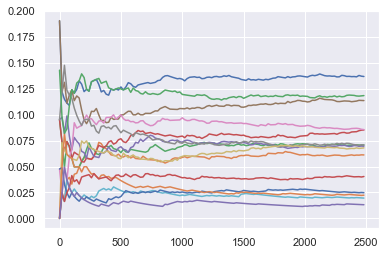

In [143]:
import matplotlib.pyplot as plt 

grouped_df = history.groupby(["page"])
for key,item in grouped_df:
    plt.plot(item["step"],item["weight"])

In [145]:
laststep = history["step"].max()
last_step_hist = history.loc[history["step"]==laststep]
last_step_hist.drop(columns=["step"],inplace=True)
last_step_hist=last_step_hist.sort_values(by="weight",ascending=False)
last_step_hist

c:\users\nguyen\pycharmprojects\nlp4web\venv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,weight,page
1860,0.136745,0.0
1872,0.118353,12.0
1865,0.113555,5.0
1866,0.085566,6.0
1863,0.085166,3.0
1862,0.070772,2.0
1867,0.070772,7.0
1864,0.069572,4.0
1868,0.067973,8.0
1861,0.061176,1.0
